Andres Soto

UNI:  ads2206 


## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [43]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

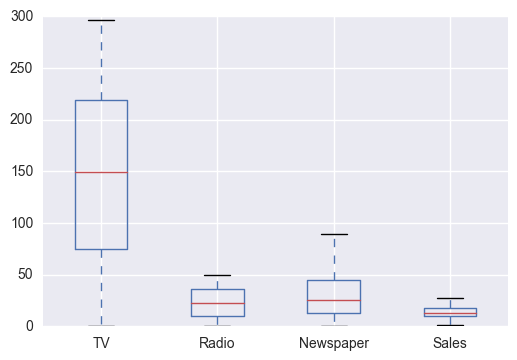

In [44]:
df.boxplot(return_type='axes')
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

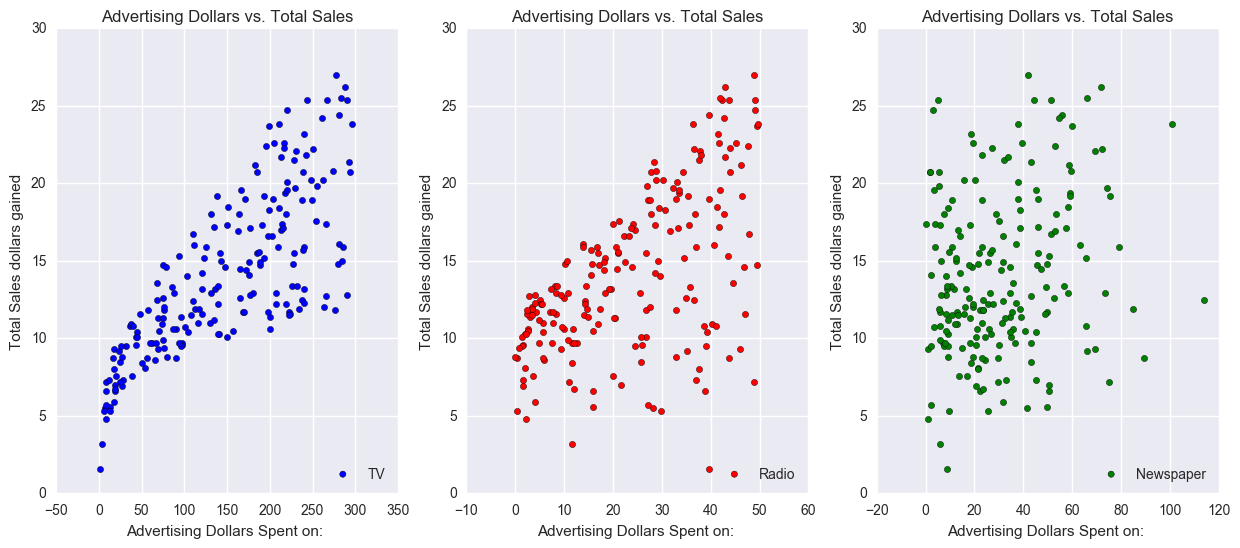

In [45]:
fig = plt.figure(figsize=(15,6))

axes = fig.add_subplot(1,3,1)
plt.scatter(df['TV'], df['Sales'], c='b', label="TV")
plt.xlabel("Advertising Dollars Spent on: ")
plt.ylabel("Total Sales dollars gained")
plt.title("Advertising Dollars vs. Total Sales")
plt.legend(loc=4)

axes = fig.add_subplot(1,3,2)
plt.scatter(df['Radio'], df['Sales'], c='r', label="Radio")
plt.xlabel("Advertising Dollars Spent on: ")
plt.ylabel("Total Sales dollars gained")
plt.title("Advertising Dollars vs. Total Sales")
plt.legend(loc=4)

axes = fig.add_subplot(1,3,3)
plt.scatter(df['Newspaper'], df['Sales'], c= 'g', label="Newspaper")
plt.xlabel("Advertising Dollars Spent on: ")
plt.ylabel("Total Sales dollars gained")
plt.title("Advertising Dollars vs. Total Sales")
plt.legend(loc=4)
plt.show()

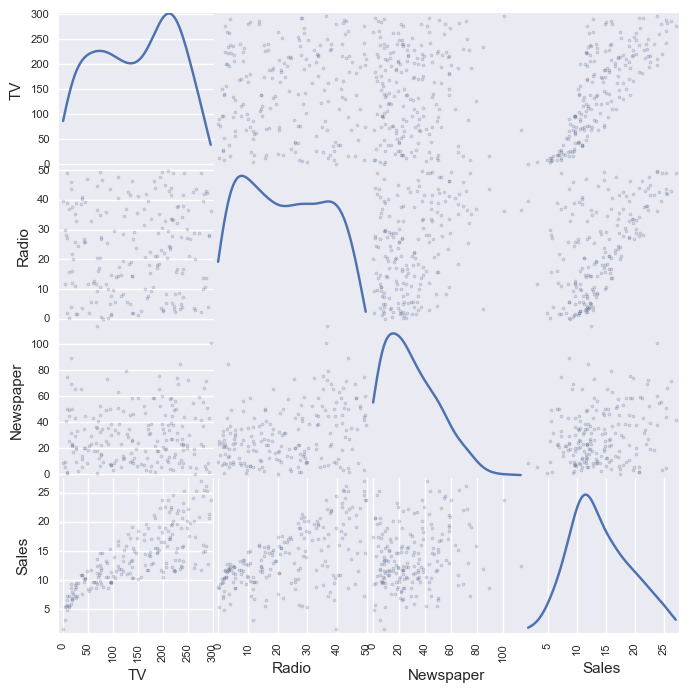

In [46]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

#### Response

There are really only six cases to consider because in the 4 by 4 grid above, the graphs along the diagonal are simply the distribution of the corresponding variables and all the scatterplots above the diagonal are just a reflection over the $y=x$ line of the diagrams below the diagonal.  

Looking along the first row, there seems to be a correlation between TV and Sales and Radio and Sales because as dollars spent on TV and Radio increases we see an increase in the number of sales.  There does not seem to be a correlation between Newspaper and Sales, however since there is no foreseeable trend between an increase in Newspaper advertisement with an increase or decrease in Sales.  

Looking along the second row, there does not seem to be a correlation between Newspaper and TV, Newspaper and Radio, because in increase one does not show a trend a decrease/increase in the other.  This makes sense since we wouldnt expect Dollars spent on Newspaper or TV or Radio to be affected on the dollars spent on other forms on advertisemtns (TV, Newspaper, or Radio).  

The same principles in the above paragraph also make me think that there is no correlation between Radio and TV in the third row since the ponts in the scatterplot are all over the place and an increase in one variable does not show a trend in an increase/decrease in the other variable.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [47]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [48]:
y = df['Sales']

b) Set X to be just the features described above in df

In [51]:
# Code here
X = df[['TV', 'Radio', 'Newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [52]:
# Code here

# professor's implementation of splitting training and testing 
# Split the data into training/testing sets
# size = df.shape[0]
# X_train = X[0:int(size*0.8)]
# X_test = X[int(size*0.8):]

# # Split the targets into training/testing sets
# y_train = y[0:int(size*0.8)]
# y_test = y[int(size*0.8):]
#===============================================================

# one could also use the method in sklearn.model_selection
import sklearn.model_selection
y_train, y_test, X_train, X_test = \
sklearn.model_selection.train_test_split(y, X, test_size=.8)

d) Train model on training data, and make predictions on testing data

In [53]:
# Code here

# create linear regression object
regr = LinearRegression()

# train the model using training data
fit = regr.fit(X_train, y_train)
coeff = regr.coef_

pred = regr.predict(X_test)

# evaluate model using testing data
MSE_test = numpy.mean((regr.predict(X_test) - y_test)** 2)
var_score_test = regr.score(X_test, y_test)

print('Coefficients: \n', coeff)
print("Residual sum of squares: %.2f" % MSE_test)
print('Variance score: %.2f' % var_score_test)



('Coefficients: \n', array([ 0.04837281,  0.18662151, -0.00822791]))
Residual sum of squares: 3.35
Variance score: 0.88


e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [54]:
# Code here
MSE_train = numpy.mean((regr.predict(X_train) - y_train)** 2)
var_score_train = regr.score(X_train, y_train)
print("Residual sum of squares: %.2f" % MSE_train)
print('Variance score: %.2f' % var_score_train)

Residual sum of squares: 2.09
Variance score: 0.91


### Response

Based on the $R^2$, it seems like we have a decent model since our variance score is pretty close to 1.  After many runs I found that the $R^2$ tends to be at least .84.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

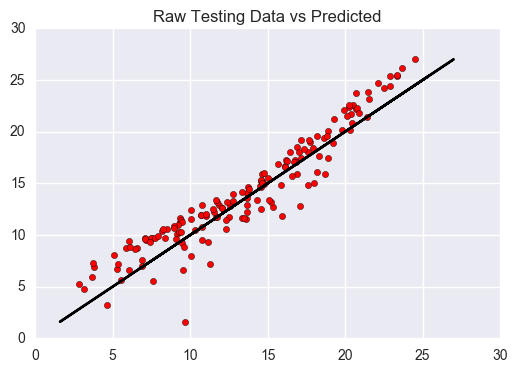

In [55]:
#plt.figure(figsize=(10,10))
plt.title("Raw Testing Data vs Predicted")
plt.scatter(regr.predict(X_test),y_test, c='r')
plt.plot(y_test,y_test, c='k')
plt.show()

Our model seems to capture the trend and seems to have pretty accurate predictions of actual data.  

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [56]:
TV_coef    = regr.coef_[0]
Radio_coef = regr.coef_[1]
Newsp_coef = regr.coef_[2]

print('TV coefficient: %f' %(TV_coef))
print('Radio coefficient: %f' %(Radio_coef))
print('Newspaper coefficient: %f' %(Newsp_coef))



TV coefficient: 0.048373
Radio coefficient: 0.186622
Newspaper coefficient: -0.008228


#### Response
It looks like radio is the most important variable in sales.  Before making conclusions, we should check on measuring correlation.  

Which is done by doing df.corr()

In [85]:
print('Correlation Matrix')
print df.corr()

Correlation Matrix
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

#### Response

Clearly from (g), we can conclude that if we hold two of the features constant and the other variable then the relative magnitude of this variable's coefficeint compared to the other coefficients reflects its importance.  In other words, because Radio has a higher coefficeint than TV and newspaper we can conclude that Radio is a more important variable with regards to increasing Sales.  Newspaper ads, seem to deter sales as there is a negative coefficient.  To measure the importantance of these features, we should have calculate their individual correlation with Sales.  More importantly, we should have normalized our data to make each feature have equal weight since this has not been done.  

In [58]:
from sklearn import preprocessing

X_norm = preprocessing.normalize(X)

# split data now with our normalized data
y_train, y_test, X_train, X_test = \
sklearn.model_selection.train_test_split(y, X, test_size=.8)

regr_norm = LinearRegression()
regr_norm.fit(X_train,y_train)

print regr_norm.coef_

[ 0.04642384  0.15247012  0.02728523]


Now, we can see that in fact TV has the strongest correlation which is consistent with the scatterplots we created and we see that newspaper have  a pretty bad effect on Sales overall because of the negative coefficient.  

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

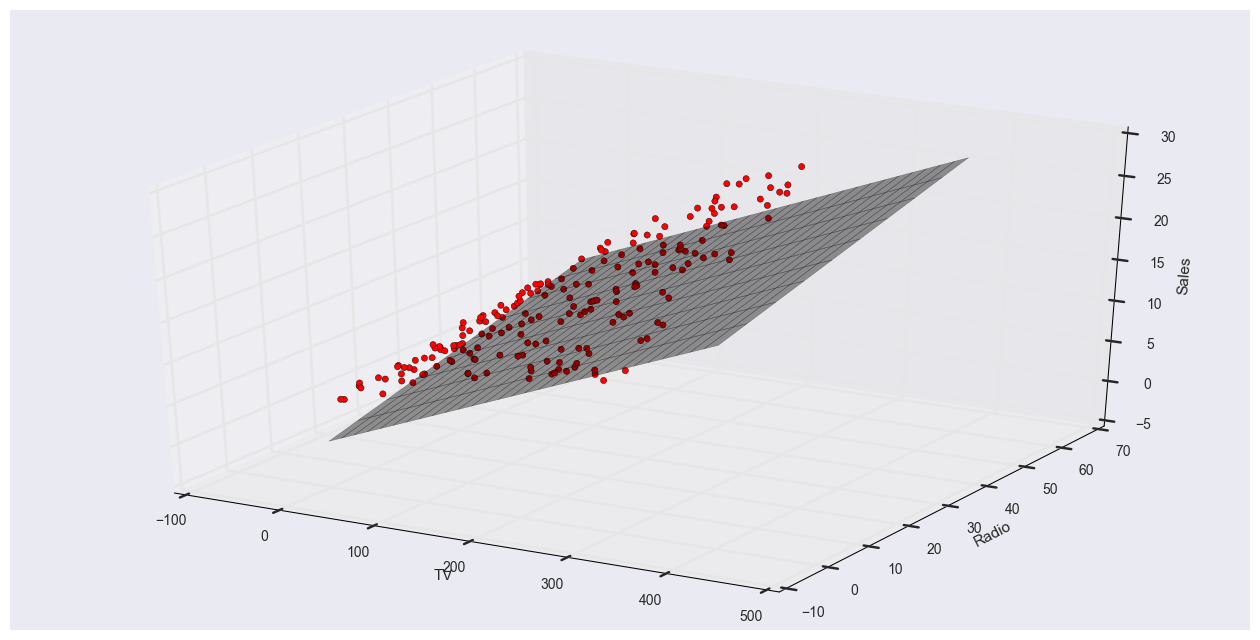

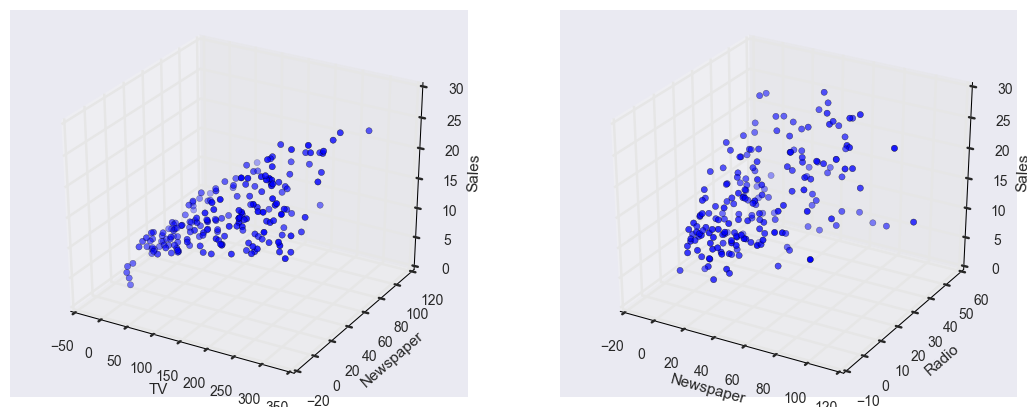

In [81]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 8))

axes = fig.add_subplot(1,1,1, projection='3d')
x = numpy.linspace(0, 400, 30)
y = numpy.linspace(0, 60,10)
x, y = numpy.meshgrid(x,y)

# return numpy array
data = pd.core.frame.DataFrame({'TV':x.ravel(), 'Radio':y.ravel()})

axes.scatter(df['TV'], df['Radio'], df['Sales'], c='r', marker='o', alpha=1)

axes.set_xlabel('TV')
axes.set_ylabel('Radio')
axes.set_zlabel('Sales')

# lets remove newspaper coefficient 
hyp_plane = regr_norm.coef_[0] * x + regr_norm.coef_[1] * y

axes.plot_surface(x,y, hyp_plane, rstride=1, \
                  cstride=1, color='black', alpha=0.4)


fig = plt.figure(figsize=(13, 5))

axes = fig.add_subplot(1,2,1, projection='3d')
axes.scatter(df.TV, df.Newspaper, df.Sales)
axes.set_xlabel('TV')
axes.set_ylabel('Newspaper')
axes.set_zlabel('Sales')

axes = fig.add_subplot(1,2,2, projection='3d')
axes.scatter(df.Newspaper, df.Radio, df.Sales)
axes.set_xlabel('Newspaper')
axes.set_ylabel('Radio')
axes.set_zlabel('Sales')

plt.show()

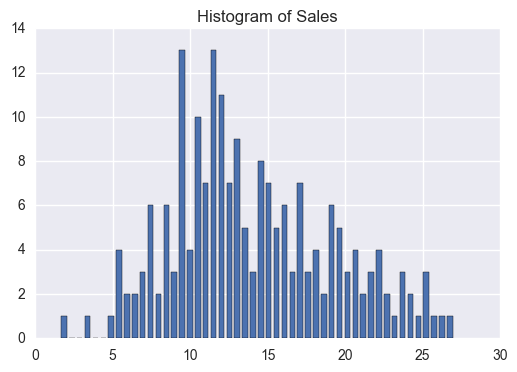

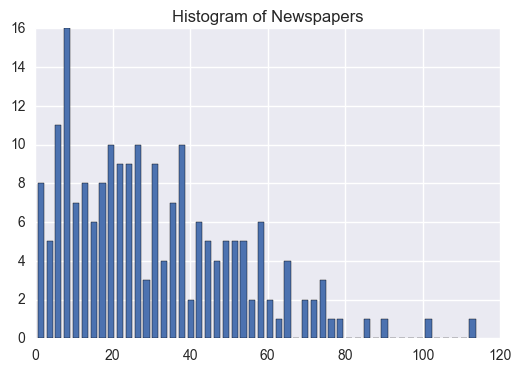

In [86]:
hist, bins = numpy.histogram(df['Sales'], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Histogram of Sales")
plt.show()

hist, bins = numpy.histogram(df.Newspaper, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Histogram of Newspapers")
plt.show()


We clearly see that in the histogram for newspapers, that this does not follow a normal distribution so it is reasonable to use a non-linear/non-parametric model to model the Newspaper feature.  It is evident that the scatter plot with TV and RADIO v Sales show a linear type of pattern in that the scatterplot demonstrates characteristics of a hypyerplane solution.  


A good idea would be to, just remove the Newspaper feature in general for a better predicting model, because we still see an inconsistency with the Newspaper feature even in the normalized data version. 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [108]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate):
    points = genfromtxt("../APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')


Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100000 iterations b = 0.000718400023237, m = 0.0363981284277, error = 5300.02618076
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


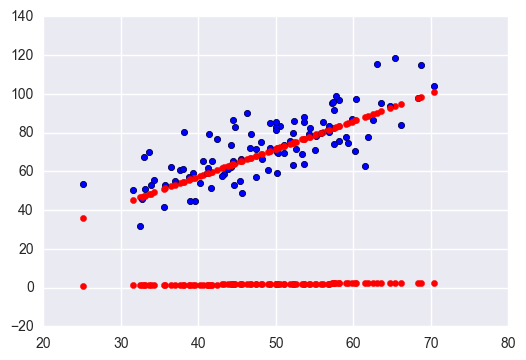

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


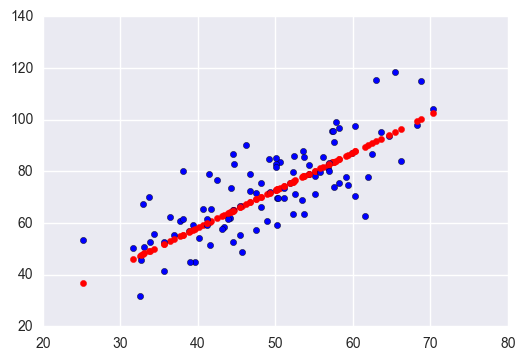

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


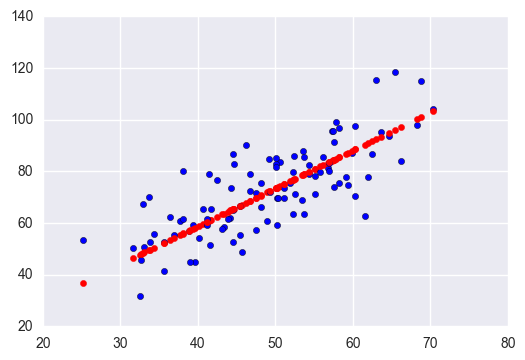

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


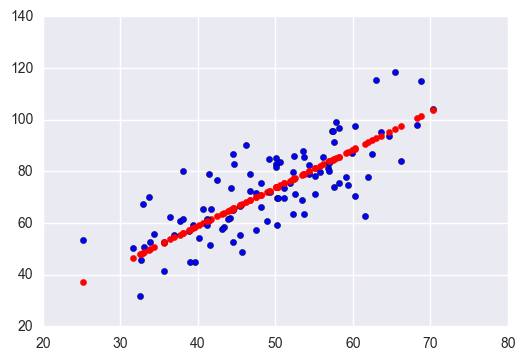

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


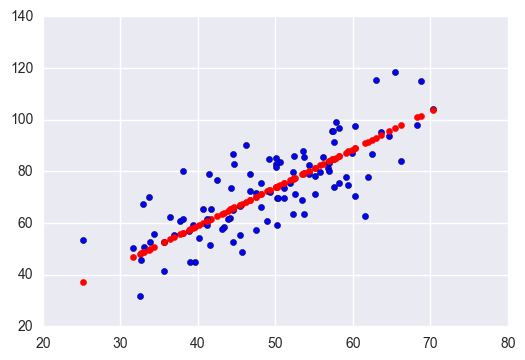

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0296686671111, m = 1.47890897678, error = 112.650305455


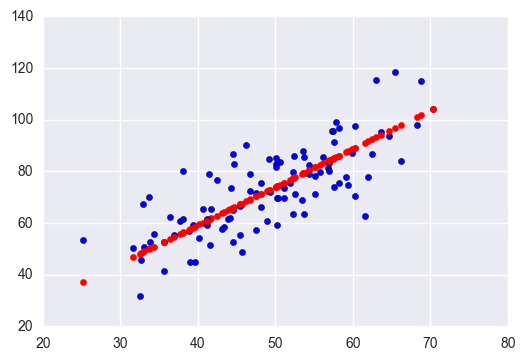

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0297888475954, m = 1.47890661467, error = 112.650233211


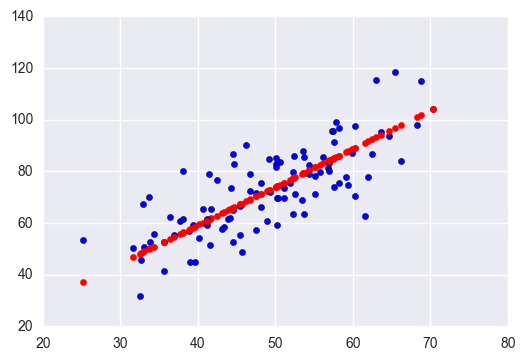

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.0299090262656, m = 1.47890425259, error = 112.650160969


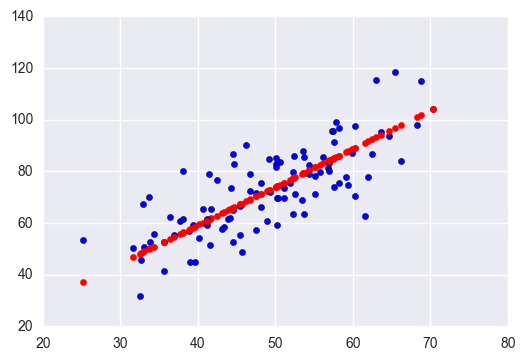

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0300292031216, m = 1.47890189055, error = 112.65008873


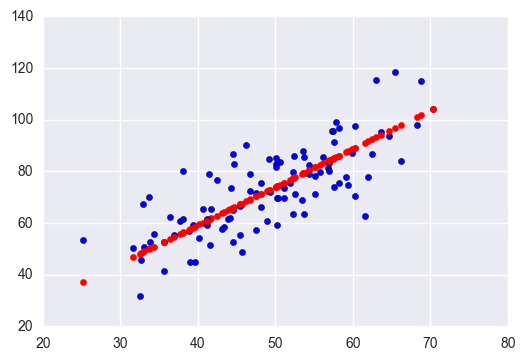

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0301493781635, m = 1.47889952855, error = 112.650016492


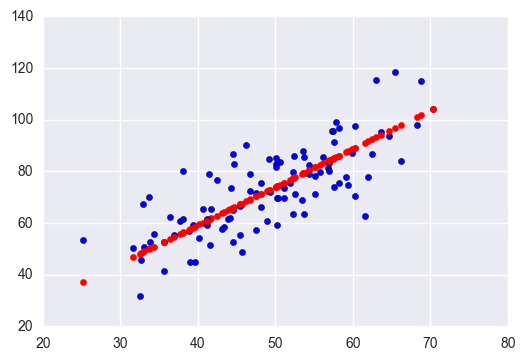

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0308343113198, m = 1.52292273114, error = 117.480666108


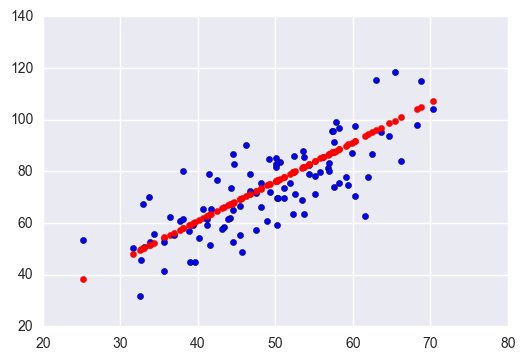

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0297209784109, m = 1.45710301483, error = 113.834356777


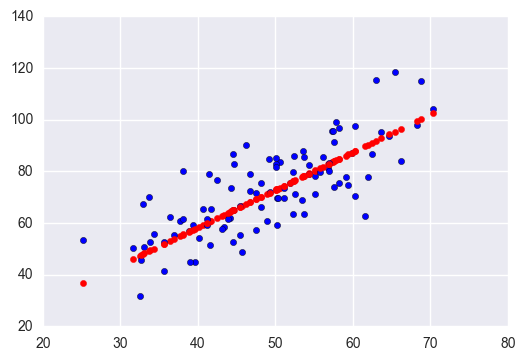

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.0305417679892, m = 1.48968861796, error = 112.940281791


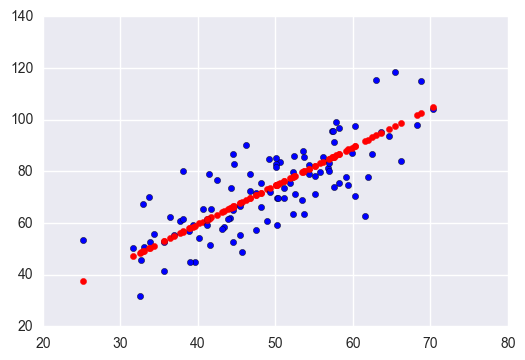

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0304048628429, m = 1.47354842676, error = 112.720992891


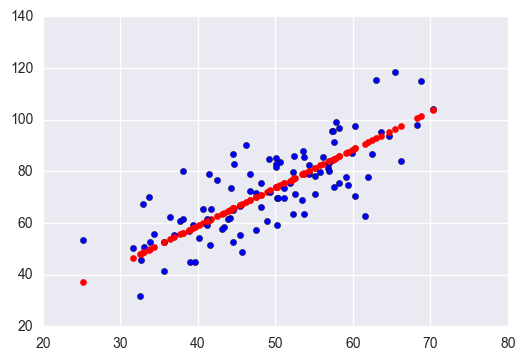

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0307421580348, m = 1.48153501107, error = 112.667146397


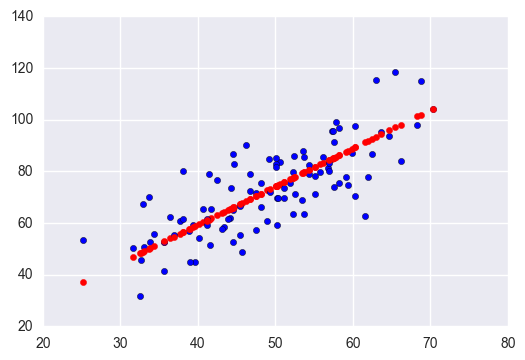

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0584102867728, m = 2.91065308349, error = 5222.87949384


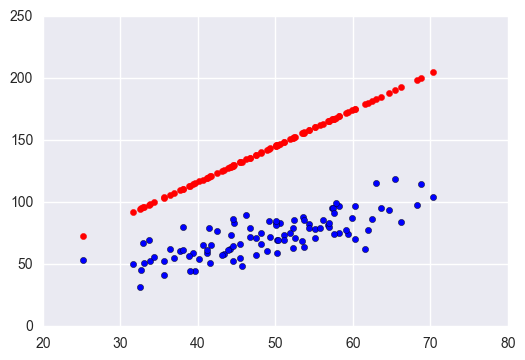

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.00255100095625, m = 0.0563874436363, error = 5157.05585311


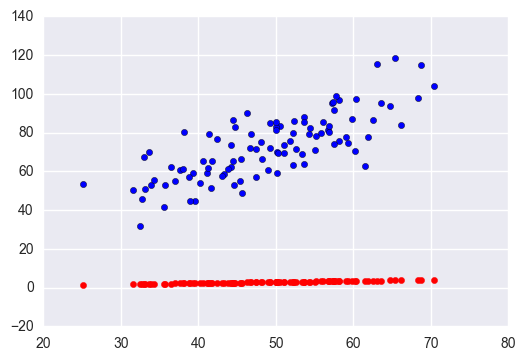

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.0585284920227, m = 2.89220157193, error = 5092.0800672


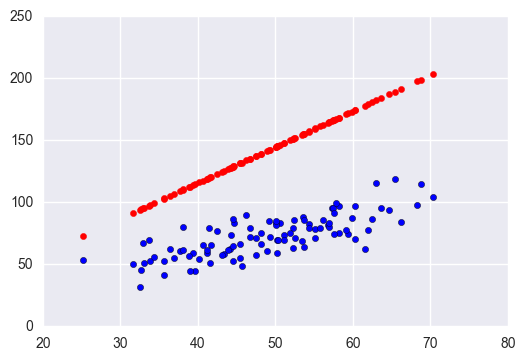

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.00339179596455, m = 0.0747009017066, error = 5027.94121511


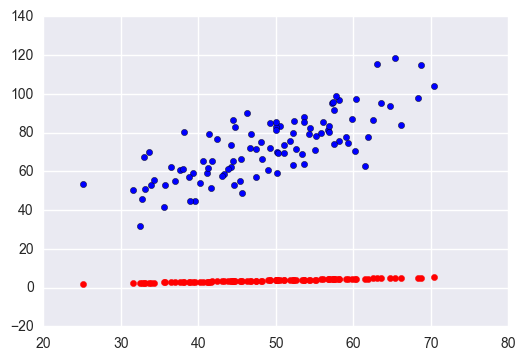

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0586513371681, m = 2.87398760823, error = 4964.62851652


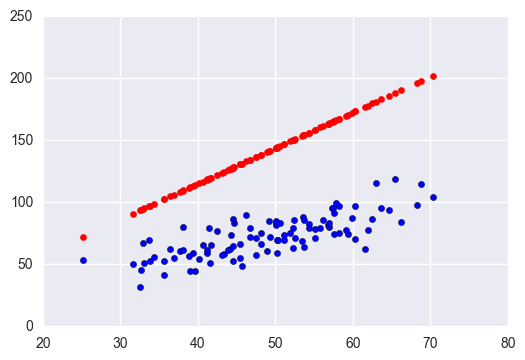

In [113]:
# Use this to visually discuss convergence rate based on learning rate
learning_rates = numpy.array([.0001, .0002, .0003, .0004])
for j in range(len(learning_rates)):
    rate = learning_rates[j]
    for i in range(5,10):
       run(i, rate)
       plt.show()


We clearly see that holding the number of iterations constant that we see divergence for a rate of .0004.  The learning rate in our gradient descent algorithm  represents the step size for which we are iterating to the ideal solution.  In theory it is possible to have so big of a step size that we never converge to the ideal solution because our next step brings us FURTHER UP the surface instead of going down the surface.  Imagine a ball rolling up and down a vally but instead of losing energy and eventually settling down to the valley, it rolls back up, above the height of where it was before.  

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

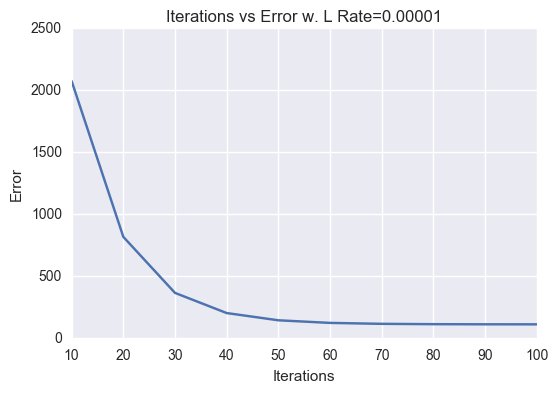

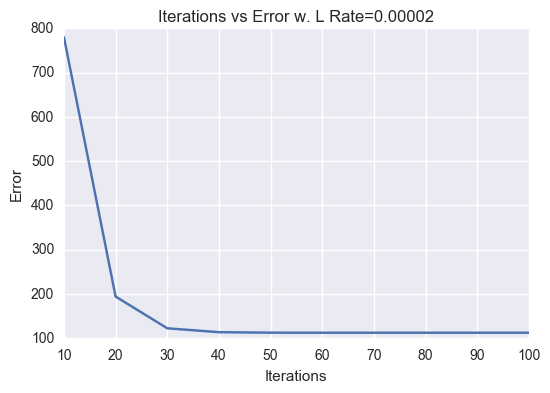

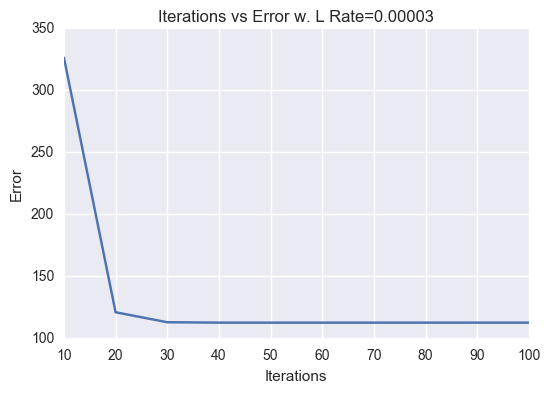

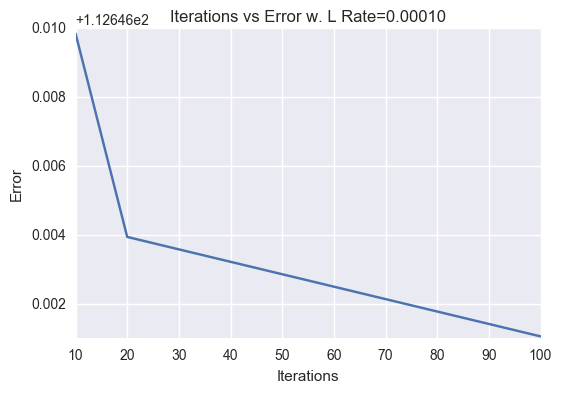

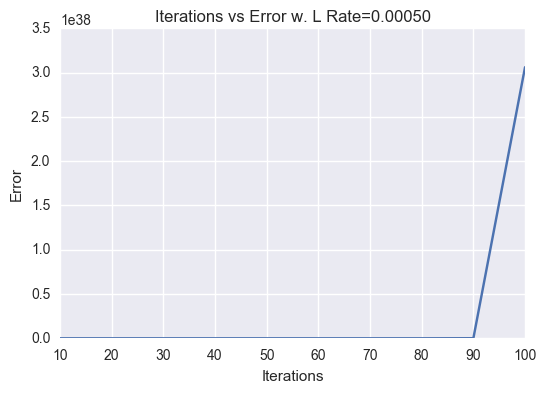

In [102]:
points = genfromtxt("../APMAE4990-/data/data.csv", delimiter=",")

rates = numpy.array([.00001, .00002,.00003, .0001, .0005])

for i in range(len(rates)):
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)
    iterations = numpy.arange(10, 110, 10)
    errors = []
    for j in range(len(iterations)):
        initial_b, initial_m = 0.0, 0.0
        b, m = gradient_descent_runner(points, initial_b, initial_m, rates[i], iterations[j])
        errors.append( compute_error_for_line_given_points(b, m, points) )
    errors = numpy.array(errors)
    axes.plot(iterations, errors)
    
    axes.set_title("Iterations vs Error w. L Rate=%.5f"%rates[i])
    axes.set_xlabel("Iterations")
    axes.set_ylabel("Error")
plt.show()